In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
from datetime import datetime


In [2]:
d = dd.read_csv(r"C:\Users\toshiba\Documents\Datasets\archive\US_Accidents_Dec20.csv",usecols=['Start_Time','State','Timezone'])

In [3]:
d.shape

(Delayed('int-53a04880-0b74-4356-a37c-03294fe63c12'), 3)

In [4]:
d.head()

,Start_Time,State,Timezone
0,2016-02-08 05:46:00,OH,US/Eastern
1,2016-02-08 06:07:59,OH,US/Eastern
2,2016-02-08 06:49:27,OH,US/Eastern
3,2016-02-08 07:23:34,OH,US/Eastern
4,2016-02-08 07:39:07,OH,US/Eastern


In [5]:
d=d.rename(columns={"Start_Time": "Date"})

In [6]:
d['Date'] = d['Date'].str.split(' ').str[0]

In [7]:
d.head()

,Date,State,Timezone
0,2016-02-08,OH,US/Eastern
1,2016-02-08,OH,US/Eastern
2,2016-02-08,OH,US/Eastern
3,2016-02-08,OH,US/Eastern
4,2016-02-08,OH,US/Eastern


In [8]:
d['Date'] = d['Date'].astype('datetime64[ns]')

In [9]:
import datetime

In [10]:
#create a dataframe with the daylight saving days from 2016-2019
#The entry for 2020 was not included since Covid-19 changed traffic patterns
l=[datetime.datetime(2016, 3, 13),datetime.datetime(2017, 3, 12),datetime.datetime(2018, 3, 11),datetime.datetime(2019, 3, 10)]
ds=pd.DataFrame(l,columns=['DS'])

In [11]:
from datetime import timedelta

In [12]:
ds['DS1']=""
ds['DS2']=""
ds['DS3']=""
ds['DS4']=""
ds['DS5']=""
ds['DS6']=""

In [13]:
#fill the dataframe with the 6 subsequent days to get the full the week of Daylight Saving
for i in range(4):
    for j in range (1,7):
        ds.loc[i,'DS'+str(j)]=ds.loc[i,'DS']+timedelta(days=j)

In [14]:
ds

,DS,DS1,DS2,DS3,DS4,DS5,DS6
0,2016-03-13,2016-03-14 00:00:00,2016-03-15 00:00:00,2016-03-16 00:00:00,2016-03-17 00:00:00,2016-03-18 00:00:00,2016-03-19 00:00:00
1,2017-03-12,2017-03-13 00:00:00,2017-03-14 00:00:00,2017-03-15 00:00:00,2017-03-16 00:00:00,2017-03-17 00:00:00,2017-03-18 00:00:00
2,2018-03-11,2018-03-12 00:00:00,2018-03-13 00:00:00,2018-03-14 00:00:00,2018-03-15 00:00:00,2018-03-16 00:00:00,2018-03-17 00:00:00
3,2019-03-10,2019-03-11 00:00:00,2019-03-12 00:00:00,2019-03-13 00:00:00,2019-03-14 00:00:00,2019-03-15 00:00:00,2019-03-16 00:00:00


In [15]:
#create the Datframe of the entries for the week before daylight saving
wb=ds.copy(deep=True)
wb=ds+timedelta(days=-7)
wb.rename(columns={"DS": "WB", "DS1": "WB1", "DS2": "WB2", "DS3": "WB3", "DS4": "WB4", "DS5": "WB5", "DS6": "WB6"},inplace=True)
wb.rename(index={0: "2016", 1: "2017", 2: "2018",3: "2019"})

,WB,WB1,WB2,WB3,WB4,WB5,WB6
2016,2016-03-06,2016-03-07 00:00:00,2016-03-08 00:00:00,2016-03-09 00:00:00,2016-03-10 00:00:00,2016-03-11 00:00:00,2016-03-12 00:00:00
2017,2017-03-05,2017-03-06 00:00:00,2017-03-07 00:00:00,2017-03-08 00:00:00,2017-03-09 00:00:00,2017-03-10 00:00:00,2017-03-11 00:00:00
2018,2018-03-04,2018-03-05 00:00:00,2018-03-06 00:00:00,2018-03-07 00:00:00,2018-03-08 00:00:00,2018-03-09 00:00:00,2018-03-10 00:00:00
2019,2019-03-03,2019-03-04 00:00:00,2019-03-05 00:00:00,2019-03-06 00:00:00,2019-03-07 00:00:00,2019-03-08 00:00:00,2019-03-09 00:00:00


In [16]:
#create the Dataframe of the entreies for the week after daylight saving
wa=ds.copy(deep=True)
wa=ds+timedelta(days=7)
wa.rename(columns={"DS": "WA", "DS1": "WA1", "DS2": "WA2", "DS3": "WA3", "DS4": "WA4", "DS5": "WA5", "DS6": "WA6"},inplace=True)
wa.rename(index={0: "2016", 1: "2017", 2: "2018",3: "2019"})

,WA,WA1,WA2,WA3,WA4,WA5,WA6
2016,2016-03-20,2016-03-21 00:00:00,2016-03-22 00:00:00,2016-03-23 00:00:00,2016-03-24 00:00:00,2016-03-25 00:00:00,2016-03-26 00:00:00
2017,2017-03-19,2017-03-20 00:00:00,2017-03-21 00:00:00,2017-03-22 00:00:00,2017-03-23 00:00:00,2017-03-24 00:00:00,2017-03-25 00:00:00
2018,2018-03-18,2018-03-19 00:00:00,2018-03-20 00:00:00,2018-03-21 00:00:00,2018-03-22 00:00:00,2018-03-23 00:00:00,2018-03-24 00:00:00
2019,2019-03-17,2019-03-18 00:00:00,2019-03-19 00:00:00,2019-03-20 00:00:00,2019-03-21 00:00:00,2019-03-22 00:00:00,2019-03-23 00:00:00


In [17]:
#create the Datframe of the entries for two weeks before daylight saving
two_wb=ds.copy(deep=True)
two_wb=ds+timedelta(days=-14)
two_wb.rename(columns={"DS": "2WB", "DS1": "2WB1", "DS2": "2WB2", "DS3": "2WB3", "DS4": "2WB4", "DS5": "2WB5", "DS6": "2WB6"},inplace=True)
two_wb.rename(index={0: "2016", 1: "2017", 2: "2018",3: "2019"})

,2WB,2WB1,2WB2,2WB3,2WB4,2WB5,2WB6
2016,2016-02-28,2016-02-29 00:00:00,2016-03-01 00:00:00,2016-03-02 00:00:00,2016-03-03 00:00:00,2016-03-04 00:00:00,2016-03-05 00:00:00
2017,2017-02-26,2017-02-27 00:00:00,2017-02-28 00:00:00,2017-03-01 00:00:00,2017-03-02 00:00:00,2017-03-03 00:00:00,2017-03-04 00:00:00
2018,2018-02-25,2018-02-26 00:00:00,2018-02-27 00:00:00,2018-02-28 00:00:00,2018-03-01 00:00:00,2018-03-02 00:00:00,2018-03-03 00:00:00
2019,2019-02-24,2019-02-25 00:00:00,2019-02-26 00:00:00,2019-02-27 00:00:00,2019-02-28 00:00:00,2019-03-01 00:00:00,2019-03-02 00:00:00


In [18]:
#create the Datframe of the entries for two weeks after daylight saving
two_wa=ds.copy(deep=True)
two_wa=ds+timedelta(days=14)
two_wa.rename(columns={"DS": "2WA", "DS1": "2WA1", "DS2": "2WA2", "DS3": "2WA3", "DS4": "2WA4", "DS5": "2WA5", "DS6": "2WA6"},inplace=True)
two_wa.rename(index={0: "2016", 1: "2017", 2: "2018",3: "2019"})

,2WA,2WA1,2WA2,2WA3,2WA4,2WA5,2WA6
2016,2016-03-27,2016-03-28 00:00:00,2016-03-29 00:00:00,2016-03-30 00:00:00,2016-03-31 00:00:00,2016-04-01 00:00:00,2016-04-02 00:00:00
2017,2017-03-26,2017-03-27 00:00:00,2017-03-28 00:00:00,2017-03-29 00:00:00,2017-03-30 00:00:00,2017-03-31 00:00:00,2017-04-01 00:00:00
2018,2018-03-25,2018-03-26 00:00:00,2018-03-27 00:00:00,2018-03-28 00:00:00,2018-03-29 00:00:00,2018-03-30 00:00:00,2018-03-31 00:00:00
2019,2019-03-24,2019-03-25 00:00:00,2019-03-26 00:00:00,2019-03-27 00:00:00,2019-03-28 00:00:00,2019-03-29 00:00:00,2019-03-30 00:00:00


In [19]:
d=d.compute()

In [20]:
d.head()

,Date,State,Timezone
0,2016-02-08,OH,US/Eastern
1,2016-02-08,OH,US/Eastern
2,2016-02-08,OH,US/Eastern
3,2016-02-08,OH,US/Eastern
4,2016-02-08,OH,US/Eastern


In [21]:
d.shape

(4232541, 3)

In [22]:
df=d[((d['Date']>=two_wb['2WB'][0])&(d['Date']<=two_wa['2WA6'][0]))|((d['Date']>=two_wb['2WB'][1])&(d['Date']<=two_wa['2WA6'][1]))|((d['Date']>=two_wb['2WB'][2])&(d['Date']<=two_wa['2WA6'][2]))|((d['Date']>=two_wb['2WB'][3])&(d['Date']<=two_wa['2WA6'][3]))]

In [23]:
df.shape

(237465, 3)

In [24]:
df.head()

,Date,State,Timezone
403,2016-02-28,OH,US/Eastern
404,2016-02-28,OH,US/Eastern
405,2016-02-29,OH,US/Eastern
406,2016-02-29,OH,US/Eastern
407,2016-02-29,OH,US/Eastern


In [25]:
#Exclude entries from the State of Arizona since Arizona does not use daylight saving time
#create a seperate dataframe for the entries from Arizona for reference
az=df[df['State']=='AZ'].copy(deep=True)
df=df[df['State']!='AZ'].copy(deep=True)

In [26]:
x=df[df['Date']==datetime.datetime(2019, 3, 23)]

In [27]:
x=df[df['Date']==wa['WA6'][3]]

In [28]:
x.shape

(1055, 3)

In [29]:
len(x)

1055

In [30]:
count_ds=ds.copy(deep=True)
count_wa=wa.copy(deep=True)
count_wb=wb.copy(deep=True)

In [31]:
count_2wa=two_wa.copy(deep=True)
count_2wb=two_wb.copy(deep=True)

In [32]:
#count the number of accidents for the Daylight savings week data frame
for i in range(4):
    for j in ds.columns:
        count_ds.loc[i,j]=len(df[df['Date']==ds.loc[i,j]])

In [33]:
count_ds

,DS,DS1,DS2,DS3,DS4,DS5,DS6
0,9,45,46,44,53,53,11
1,704,2530,2332,1953,2168,2328,865
2,783,3158,3387,3221,3370,3095,970
3,946,2369,2718,2781,2507,2593,907


In [34]:
#count the number of accidents for the Week Before Daylight savings week data frame
for i in range(4):
    for j in wb.columns:
        count_wb.loc[i,j]=len(df[df['Date']==wb.loc[i,j]])

In [35]:
#count the number of accidents for the Week After Daylight savings week data frame
for i in range(4):
    for j in wa.columns:
        count_wa.loc[i,(j)]=len(df[df['Date']==wa.loc[i,j]])

In [36]:
#count the number of accidents for the Week 2 weeks Before Daylight savings data frame
for i in range(4):
    for j in two_wb.columns:
        count_2wb.loc[i,j]=len(df[df['Date']==two_wb.loc[i,j]])

In [37]:
#count the number of accidents for the Week 2 weeks After Daylight savings data frame
for i in range(4):
    for j in two_wa.columns:
        count_2wa.loc[i,j]=len(df[df['Date']==two_wa.loc[i,j]])

In [38]:
count_2wa

,2WA,2WA1,2WA2,2WA3,2WA4,2WA5,2WA6
0,263,652,723,828,678,878,260
1,601,1939,2191,2280,2134,2118,667
2,795,3104,2948,1768,3324,2853,693
3,865,2543,2744,2866,2742,2731,1056


In [39]:
count_wa

,WA,WA1,WA2,WA3,WA4,WA5,WA6
0,7,49,82,704,822,504,251
1,763,2300,2229,2180,2028,2429,809
2,729,2797,3419,3472,3447,3251,808
3,769,2515,2737,3024,2848,2852,1055


In [40]:
count_wb

,WB,WB1,WB2,WB3,WB4,WB5,WB6
0,4,41,51,42,72,61,10
1,711,2146,2165,2093,2117,2325,780
2,706,2859,3072,2445,1214,3103,944
3,900,2796,3014,3051,2936,2969,1018


In [41]:
count_ds

,DS,DS1,DS2,DS3,DS4,DS5,DS6
0,9,45,46,44,53,53,11
1,704,2530,2332,1953,2168,2328,865
2,783,3158,3387,3221,3370,3095,970
3,946,2369,2718,2781,2507,2593,907


In [42]:
count_2wb

,2WB,2WB1,2WB2,2WB3,2WB4,2WB5,2WB6
0,7,36,55,40,64,58,7
1,720,2043,2266,2366,2254,2303,743
2,811,3099,3065,2931,3211,2943,897
3,964,3083,3099,3422,2814,3127,810


In [43]:
#Convert the entries to integers so that we can perform calculations on the dataframe
count_wb=count_wb.apply(pd.to_numeric)
count_ds=count_ds.apply(pd.to_numeric)
count_wa=count_wa.apply(pd.to_numeric)

In [44]:
count_2wb=count_2wb.apply(pd.to_numeric)
count_2wa=count_2wa.apply(pd.to_numeric)

In [45]:
#Create a total column to find the sum of all accidents for a given week
count_wb['Total']=count_wb.sum(axis=1)
count_ds['Total']=count_ds.sum(axis=1)
count_wa['Total']=count_wa.sum(axis=1)

In [46]:
count_2wb['Total']=count_2wb.sum(axis=1)
count_2wa['Total']=count_2wa.sum(axis=1)

In [47]:
#Drop the 2016 entries since there isn't enough data during this year
count_2wb=count_2wb[1:4].copy(deep=True)
count_wb=count_wb[1:4].copy(deep=True)
count_ds=count_ds[1:4].copy(deep=True)
count_wa=count_wa[1:4].copy(deep=True)
count_2wa=count_2wa[1:4].copy(deep=True)

In [48]:
count_wb.loc['mean'] = count_wb.mean()
count_ds.loc['mean'] = count_ds.mean()
count_wa.loc['mean'] = count_wa.mean()
count_2wb.loc['mean'] = count_2wb.mean()
count_2wa.loc['mean'] = count_2wa.mean()

In [53]:
count_wb

,WB,WB1,WB2,WB3,WB4,WB5,WB6,Total
1,711.000000,2146.000000,2165.000000,2093.000000,2117.0,2325.0,780.0,12337.000000
2,706.000000,2859.000000,3072.000000,2445.000000,1214.0,3103.0,944.0,14343.000000
3,900.000000,2796.000000,3014.000000,3051.000000,2936.0,2969.0,1018.0,16684.000000
mean,772.333333,2600.333333,2750.333333,2529.666667,2089.0,2799.0,914.0,14454.666667


In [54]:
count_ds

,DS,DS1,DS2,DS3,DS4,DS5,DS6,Total
1,704.0,2530.000000,2332.000000,1953.000000,2168.000000,2328.0,865.0,12880.000000
2,783.0,3158.000000,3387.000000,3221.000000,3370.000000,3095.0,970.0,17984.000000
3,946.0,2369.000000,2718.000000,2781.000000,2507.000000,2593.0,907.0,14821.000000
mean,811.0,2685.666667,2812.333333,2651.666667,2681.666667,2672.0,914.0,15228.333333


In [55]:
count_wa

,WA,WA1,WA2,WA3,WA4,WA5,WA6,Total
1,763.000000,2300.000000,2229.0,2180.0,2028.000000,2429.0,809.000000,12738.0
2,729.000000,2797.000000,3419.0,3472.0,3447.000000,3251.0,808.000000,17923.0
3,769.000000,2515.000000,2737.0,3024.0,2848.000000,2852.0,1055.000000,15800.0
mean,753.666667,2537.333333,2795.0,2892.0,2774.333333,2844.0,890.666667,15487.0


In [56]:
#The Timezone has NaN entries due to the timezone changing and we can't segment solely based on Timezone
df[(df['Timezone']!='US/Eastern')&(df['Timezone']!='US/Pacific')&(df['Timezone']!='US/Central')&(df['Timezone']!='US/Mountain')]

,Date,State,Timezone
31135,2016-03-23,CA,NaN
3211,2017-03-08,CA,NaN
3990,2017-03-14,CA,NaN
4090,2017-03-15,CA,NaN
20755,2017-03-10,FL,NaN
...,...,...,...
43078,2018-03-19,FL,NaN
43827,2018-03-20,OR,NaN
44332,2018-03-21,UT,NaN
45761,2018-03-25,SC,NaN


In [57]:
df[(df['Timezone']!='US/Eastern')&(df['Timezone']!='US/Pacific')&(df['Timezone']!='US/Central')&(df['Timezone']!='US/Mountain')].State.unique()

array(['CA', 'FL', 'SC', 'TX', 'UT', 'IL', 'OR', 'MD', 'LA'], dtype=object)

In [58]:
df.Timezone.unique()

array(['US/Eastern', 'US/Pacific', nan, 'US/Central', 'US/Mountain'],
      dtype=object)

In [59]:
#looking at the pacific timezone
pacific=df[(df['Timezone']=='US/Pacific')|(df['State']=='CA')|(df['State']=='OR')].copy(deep=True)

In [60]:
pac_count_ds=ds.copy(deep=True)
pac_count_wa=wa.copy(deep=True)
pac_count_wb=wb.copy(deep=True)
pac_count_2wa=two_wa.copy(deep=True)
pac_count_2wb=two_wb.copy(deep=True)

In [61]:
#count the number of accidents for the Week Before Daylight savings week  
for i in range(4):
    for j in wb.columns:
        pac_count_wb.loc[i,j]=len(pacific[pacific['Date']==wb.loc[i,j]])

In [62]:
#count the number of accidents for the Daylight savings week 
for i in range(4):
    for j in ds.columns:
        pac_count_ds.loc[i,j]=len(pacific[pacific['Date']==ds.loc[i,j]])

In [63]:
#count the number of accidents for the Week After Daylight savings
for i in range(4):
    for j in wa.columns:
        pac_count_wa.loc[i,(j)]=len(pacific[pacific['Date']==wa.loc[i,j]])

In [64]:
#count the number of accidents for the Week 2 weeks Before Daylight savings
for i in range(4):
    for j in two_wb.columns:
        pac_count_2wb.loc[i,j]=len(pacific[pacific['Date']==two_wb.loc[i,j]])

In [65]:
#count the number of accidents for the Week 2 weeks After Daylight savings
for i in range(4):
    for j in two_wa.columns:
        pac_count_2wa.loc[i,j]=len(pacific[pacific['Date']==two_wa.loc[i,j]])

In [66]:
#Convert the entries to integers so that we can perform calculations on the dataframe
pac_count_wb=pac_count_wb.apply(pd.to_numeric)
pac_count_ds=pac_count_ds.apply(pd.to_numeric)
pac_count_wa=pac_count_wa.apply(pd.to_numeric)
pac_count_2wa=pac_count_2wa.apply(pd.to_numeric)
pac_count_2wb=pac_count_2wb.apply(pd.to_numeric)
#Create a total column to find the sum of all accidents for a given week
pac_count_wb['Total']=pac_count_wb.sum(axis=1)
pac_count_ds['Total']=pac_count_ds.sum(axis=1)
pac_count_wa['Total']=pac_count_wa.sum(axis=1)
pac_count_2wb['Total']=pac_count_2wb.sum(axis=1)
pac_count_2wa['Total']=pac_count_2wa.sum(axis=1)

In [67]:
pac_count_2wa=pac_count_2wa.loc[[1,2,3],:].copy(deep=True)
pac_count_wa=pac_count_wa.loc[[1,2,3],:].copy(deep=True)
pac_count_ds=pac_count_ds.loc[[1,2,3],:].copy(deep=True)
pac_count_wb=pac_count_wb.loc[[1,2,3],:].copy(deep=True)
pac_count_2wb=pac_count_2wb.loc[[1,2,3],:].copy(deep=True)

In [68]:
pac_count_wb.loc['mean'] = pac_count_wb.mean()
pac_count_ds.loc['mean'] = pac_count_ds.mean()
pac_count_wa.loc['mean'] = pac_count_wa.mean()
pac_count_2wb.loc['mean'] = pac_count_2wb.mean()
pac_count_2wa.loc['mean'] = pac_count_2wa.mean()

In [69]:
pac_count_2wb

,2WB,2WB1,2WB2,2WB3,2WB4,2WB5,2WB6,Total
1,321.0,645.0,557.0,605.000000,603.000000,593.000000,299.000000,3623.000000
2,270.0,777.0,698.0,640.000000,776.000000,743.000000,371.000000,4275.000000
3,531.0,1158.0,836.0,803.000000,678.000000,582.000000,253.000000,4841.000000
mean,374.0,860.0,697.0,682.666667,685.666667,639.333333,307.666667,4246.333333


In [70]:
pac_count_wb

,WB,WB1,WB2,WB3,WB4,WB5,WB6,Total
1,281.0,553.000000,546.000000,534.000000,629.000000,664.000000,329.0,3536.000000
2,231.0,654.000000,590.000000,480.000000,362.000000,572.000000,323.0,3212.000000
3,292.0,672.000000,716.000000,763.000000,676.000000,791.000000,371.0,4281.000000
mean,268.0,626.333333,617.333333,592.333333,555.666667,675.666667,341.0,3676.333333


In [71]:
pac_count_ds

,DS,DS1,DS2,DS3,DS4,DS5,DS6,Total
1,295.0,470.000000,499.000000,541.0,549.000000,651.0,315.000000,3320.0
2,268.0,731.000000,765.000000,701.0,790.000000,726.0,374.000000,4355.0
3,322.0,504.000000,628.000000,594.0,574.000000,630.0,341.000000,3593.0
mean,295.0,568.333333,630.666667,612.0,637.666667,669.0,343.333333,3756.0


In [72]:
pac_count_wa

,WA,WA1,WA2,WA3,WA4,WA5,WA6,Total
1,265.000000,624.0,640.0,721.0,578.000000,849.0,270.000000,3947.000000
2,270.000000,489.0,673.0,882.0,887.000000,788.0,321.000000,4310.000000
3,285.000000,636.0,655.0,758.0,595.000000,583.0,401.000000,3913.000000
mean,273.333333,583.0,656.0,787.0,686.666667,740.0,330.666667,4056.666667


In [73]:
pac_count_2wa

,2WA,2WA1,2WA2,2WA3,2WA4,2WA5,2WA6,Total
1,235.000000,564.000000,659.0,638.000000,692.000000,635.000000,286.0,3709.000000
2,315.000000,658.000000,644.0,487.000000,694.000000,600.000000,253.0,3651.000000
3,316.000000,522.000000,536.0,623.000000,565.000000,534.000000,325.0,3421.000000
mean,288.666667,581.333333,613.0,582.666667,650.333333,589.666667,288.0,3593.666667


In [74]:
az.head()

,Date,State,Timezone
1082,2019-03-03,AZ,US/Mountain
1083,2019-03-03,AZ,US/Mountain
1084,2019-03-03,AZ,US/Mountain
1085,2019-03-03,AZ,US/Mountain
1086,2019-03-03,AZ,US/Mountain


In [75]:
az_count_ds=ds.copy(deep=True)
az_count_wa=wa.copy(deep=True)
az_count_wb=wb.copy(deep=True)
az_count_2wa=two_wa.copy(deep=True)
az_count_2wb=two_wb.copy(deep=True)

In [76]:
#count the number of accidents for the Week Before Daylight savings week 
for i in range(4):
    for j in wb.columns:
        az_count_wb.loc[i,j]=len(az[az['Date']==wb.loc[i,j]])

In [77]:
#count the number of accidents for the Daylight savings 
for i in range(4):
    for j in ds.columns:
        az_count_ds.loc[i,j]=len(az[az['Date']==ds.loc[i,j]])

In [78]:
#count the number of accidents for the Week After Daylight savings 
for i in range(4):
    for j in wa.columns:
        az_count_wa.loc[i,(j)]=len(az[az['Date']==wa.loc[i,j]])

In [79]:
#count the number of accidents for the Week 2 weeks Before Daylight savings
for i in range(4):
    for j in two_wb.columns:
        az_count_2wb.loc[i,j]=len(az[az['Date']==two_wb.loc[i,j]])

In [80]:
#count the number of accidents for the Week 2 weeks After Daylight savings
for i in range(4):
    for j in two_wa.columns:
        az_count_2wa.loc[i,j]=len(az[az['Date']==two_wa.loc[i,j]])

In [81]:
#Convert the entries to integers so that we can perform calculations on the dataframe
az_count_wb=az_count_wb.apply(pd.to_numeric)
az_count_ds=az_count_ds.apply(pd.to_numeric)
az_count_wa=az_count_wa.apply(pd.to_numeric)
az_count_2wa=az_count_2wa.apply(pd.to_numeric)
az_count_2wb=az_count_2wb.apply(pd.to_numeric)
#Create a total column to find the sum of all accidents for a given week
az_count_wb['Total']=az_count_wb.sum(axis=1)
az_count_ds['Total']=az_count_ds.sum(axis=1)
az_count_wa['Total']=az_count_wa.sum(axis=1)
az_count_2wb['Total']=az_count_2wb.sum(axis=1)
az_count_2wa['Total']=az_count_2wa.sum(axis=1)

In [82]:
az_count_wa=az_count_wa.loc[[1,2,3],:].copy(deep=True)
az_count_2wa=az_count_2wa.loc[[1,2,3],:].copy(deep=True)
az_count_ds=az_count_ds.loc[[1,2,3],:].copy(deep=True)
az_count_wb=az_count_wb.loc[[1,2,3],:].copy(deep=True)
az_count_2wb=az_count_2wb.loc[[1,2,3],:].copy(deep=True)

In [83]:
az_count_wb.loc['mean'] = az_count_wb.mean()
az_count_ds.loc['mean'] = az_count_ds.mean()
az_count_wa.loc['mean'] = az_count_wa.mean()
az_count_2wb.loc['mean'] = az_count_2wb.mean()
az_count_2wa.loc['mean'] = az_count_2wa.mean()

In [84]:
az_count_wb

,WB,WB1,WB2,WB3,WB4,WB5,WB6,Total
1,2.000000,7.000000,15.000000,15.000000,13.000000,22.000000,0.000000,74.000000
2,16.000000,81.000000,76.000000,77.000000,57.000000,99.000000,34.000000,440.000000
3,8.000000,79.000000,127.000000,108.000000,79.000000,97.000000,21.000000,519.000000
mean,8.666667,55.666667,72.666667,66.666667,49.666667,72.666667,18.333333,344.333333


In [85]:
az_count_ds

,DS,DS1,DS2,DS3,DS4,DS5,DS6,Total
1,2.000000,14.0,11.000000,13.000000,10.000000,19.0,3.000000,72.000000
2,29.000000,68.0,31.000000,16.000000,13.000000,23.0,24.000000,204.000000
3,9.000000,83.0,56.000000,60.000000,81.000000,51.0,16.000000,356.000000
mean,13.333333,55.0,32.666667,29.666667,34.666667,31.0,14.333333,210.666667


In [86]:
az_count_wa

,WA,WA1,WA2,WA3,WA4,WA5,WA6,Total
1,7.000000,12.000000,11.0,20.0,17.000000,17.000000,9.000000,93.000000
2,11.000000,79.000000,106.0,63.0,54.000000,70.000000,25.000000,408.000000
3,17.000000,66.000000,69.0,64.0,80.000000,92.000000,13.000000,401.000000
mean,11.666667,52.333333,62.0,49.0,50.333333,59.666667,15.666667,300.666667


In [87]:
az_count_2wa

,2WA,2WA1,2WA2,2WA3,2WA4,2WA5,2WA6,Total
1,10.000000,18.000000,18.0,9.0,17.000000,20.000000,7.000000,99.0
2,23.000000,69.000000,77.0,44.0,78.000000,89.000000,26.000000,406.0
3,20.000000,83.000000,85.0,61.0,74.000000,61.000000,23.000000,407.0
mean,17.666667,56.666667,60.0,38.0,56.333333,56.666667,18.666667,304.0


In [88]:
az_count_wb

,WB,WB1,WB2,WB3,WB4,WB5,WB6,Total
1,2.000000,7.000000,15.000000,15.000000,13.000000,22.000000,0.000000,74.000000
2,16.000000,81.000000,76.000000,77.000000,57.000000,99.000000,34.000000,440.000000
3,8.000000,79.000000,127.000000,108.000000,79.000000,97.000000,21.000000,519.000000
mean,8.666667,55.666667,72.666667,66.666667,49.666667,72.666667,18.333333,344.333333


In [89]:
count_2wa

,2WA,2WA1,2WA2,2WA3,2WA4,2WA5,2WA6,Total
1,601.000000,1939.000000,2191.000000,2280.000000,2134.000000,2118.000000,667.000000,11930.000000
2,795.000000,3104.000000,2948.000000,1768.000000,3324.000000,2853.000000,693.000000,15485.000000
3,865.000000,2543.000000,2744.000000,2866.000000,2742.000000,2731.000000,1056.000000,15547.000000
mean,753.666667,2528.666667,2627.666667,2304.666667,2733.333333,2567.333333,805.333333,14320.666667


In [90]:
#create the moving average table for 3 days (Sunday-Tuesday) for the weeks of interest
ma=pd.DataFrame()
ma['2WB']=""
ma['WB']=""
ma['DS']=""
ma['WA']=""
ma['2WA']=""

In [91]:
ma.loc[0,'2WB']=(count_2wb.loc['mean','2WB']+count_2wb.loc['mean','2WB1']+count_2wb.loc['mean','2WB2'])/3
ma.loc[0,'WB']=(count_wb.loc['mean','WB']+count_wb.loc['mean','WB1']+count_wb.loc['mean','WB2'])/3
ma.loc[0,'DS']=(count_ds.loc['mean','DS']+count_ds.loc['mean','DS1']+count_ds.loc['mean','DS2'])/3
ma.loc[0,'WA']=(count_wa.loc['mean','WA']+count_wa.loc['mean','WA1']+count_wa.loc['mean','WA2'])/3
ma.loc[0,'2WA']=(count_2wa.loc['mean','2WA']+count_2wa.loc['mean','2WA1']+count_2wa.loc['mean','2WA2'])/3


In [92]:
ma

,2WB,WB,DS,WA,2WA
0,2127.78,2041,2103,2028.67,1970


In [93]:
#create the moving average table for 3 days (Sunday-Tuesday) for the weeks of interest for the Pacific Data
pac_ma=pd.DataFrame()
pac_ma['2WB']=""
pac_ma['WB']=""
pac_ma['DS']=""
pac_ma['WA']=""
pac_ma['2WA']=""

In [94]:
pac_ma.loc[0,'2WB']=(pac_count_2wb.loc['mean','2WB']+pac_count_2wb.loc['mean','2WB1']+pac_count_2wb.loc['mean','2WB2'])/3
pac_ma.loc[0,'WB']=(pac_count_wb.loc['mean','WB']+pac_count_wb.loc['mean','WB1']+pac_count_wb.loc['mean','WB2'])/3
pac_ma.loc[0,'DS']=(pac_count_ds.loc['mean','DS']+pac_count_ds.loc['mean','DS1']+pac_count_ds.loc['mean','DS2'])/3
pac_ma.loc[0,'WA']=(pac_count_wa.loc['mean','WA']+pac_count_wa.loc['mean','WA1']+pac_count_wa.loc['mean','WA2'])/3
pac_ma.loc[0,'2WA']=(pac_count_2wa.loc['mean','2WA']+pac_count_2wa.loc['mean','2WA1']+pac_count_2wa.loc['mean','2WA2'])/3

In [95]:
pac_ma

,2WB,WB,DS,WA,2WA
0,643.667,503.889,498,504.111,494.333


In [96]:
#create the moving average table for 3 days (Sunday-Tuesday) for the weeks of interest for the Arizona Data
az_ma=pd.DataFrame()
az_ma['2WB']=""
az_ma['WB']=""
az_ma['DS']=""
az_ma['WA']=""
az_ma['2WA']=""

In [97]:
az_ma.loc[0,'2WB']=(az_count_2wb.loc['mean','2WB']+az_count_2wb.loc['mean','2WB1']+az_count_2wb.loc['mean','2WB2'])/3
az_ma.loc[0,'WB']=(az_count_wb.loc['mean','WB']+az_count_wb.loc['mean','WB1']+az_count_wb.loc['mean','WB2'])/3
az_ma.loc[0,'DS']=(az_count_ds.loc['mean','DS']+az_count_ds.loc['mean','DS1']+az_count_ds.loc['mean','DS2'])/3
az_ma.loc[0,'WA']=(az_count_wa.loc['mean','WA']+az_count_wa.loc['mean','WA1']+az_count_wa.loc['mean','WA2'])/3
az_ma.loc[0,'2WA']=(az_count_2wa.loc['mean','2WA']+az_count_2wa.loc['mean','2WA1']+az_count_2wa.loc['mean','2WA2'])/3

In [98]:
ma

,2WB,WB,DS,WA,2WA
0,2127.78,2041,2103,2028.67,1970


In [99]:
pac_ma

,2WB,WB,DS,WA,2WA
0,643.667,503.889,498,504.111,494.333


In [100]:
az_ma

,2WB,WB,DS,WA,2WA
0,48.1111,45.6667,33.6667,42,44.7778


In [101]:
ca=df[df['State']=='CA'].copy(deep=True)

In [102]:
ca

,Date,State,Timezone
31113,2016-03-22,CA,US/Pacific
31114,2016-03-22,CA,US/Pacific
31115,2016-03-22,CA,US/Pacific
31116,2016-03-22,CA,US/Pacific
31117,2016-03-22,CA,US/Pacific
...,...,...,...
61535,2018-02-27,CA,US/Pacific
61536,2018-02-27,CA,US/Pacific
61537,2018-02-27,CA,US/Pacific
61538,2018-02-27,CA,US/Pacific


In [103]:
ca_count_ds=ds.copy(deep=True)
ca_count_wa=wa.copy(deep=True)
ca_count_wb=wb.copy(deep=True)
ca_count_2wa=two_wa.copy(deep=True)
ca_count_2wb=two_wb.copy(deep=True)

In [104]:
#count the number of accidents for the Week Before Daylight savings week
for i in range(4):
    for j in wb.columns:
        ca_count_wb.loc[i,j]=len(ca[ca['Date']==wb.loc[i,j]])

In [105]:
#count the number of accidents for the Daylight savings week 
for i in range(4):
    for j in ds.columns:
        ca_count_ds.loc[i,j]=len(ca[ca['Date']==ds.loc[i,j]])

In [106]:
#count the number of accidents for the Week After Daylight savings week 
for i in range(4):
    for j in wa.columns:
        ca_count_wa.loc[i,(j)]=len(ca[ca['Date']==wa.loc[i,j]])

In [107]:
#count the number of accidents for the Week 2 weeks Before Daylight savings 
for i in range(4):
    for j in two_wb.columns:
        ca_count_2wb.loc[i,j]=len(ca[ca['Date']==two_wb.loc[i,j]])

In [108]:
#count the number of accidents for the Week 2 weeks After Daylight savings 
for i in range(4):
    for j in two_wa.columns:
        ca_count_2wa.loc[i,j]=len(ca[ca['Date']==two_wa.loc[i,j]])

In [109]:
#Convert the entries to integers so that we can perform calculations on the dataframe
ca_count_wb=ca_count_wb.apply(pd.to_numeric)
ca_count_ds=ca_count_ds.apply(pd.to_numeric)
ca_count_wa=ca_count_wa.apply(pd.to_numeric)
ca_count_2wa=ca_count_2wa.apply(pd.to_numeric)
ca_count_2wb=ca_count_2wb.apply(pd.to_numeric)
#Create a total column to find the sum of all accidents for a given week
ca_count_wb['Total']=ca_count_wb.sum(axis=1)
ca_count_ds['Total']=ca_count_ds.sum(axis=1)
ca_count_wa['Total']=ca_count_wa.sum(axis=1)
ca_count_2wb['Total']=ca_count_2wb.sum(axis=1)
ca_count_2wa['Total']=ca_count_2wa.sum(axis=1)

In [110]:
ca_count_wa=ca_count_wa.loc[[1,2,3],:].copy(deep=True)
ca_count_2wa=ca_count_2wa.loc[[1,2,3],:].copy(deep=True)
ca_count_ds=ca_count_ds.loc[[1,2,3],:].copy(deep=True)
ca_count_wb=ca_count_wb.loc[[1,2,3],:].copy(deep=True)
ca_count_2wb=ca_count_2wb.loc[[1,2,3],:].copy(deep=True)

In [111]:
ca_count_wb.loc['mean'] = ca_count_wb.mean()
ca_count_ds.loc['mean'] = ca_count_ds.mean()
ca_count_wa.loc['mean'] = ca_count_wa.mean()
ca_count_2wb.loc['mean'] = ca_count_2wb.mean()
ca_count_2wa.loc['mean'] = ca_count_2wa.mean()

In [112]:
#create the moving average table for 3 days (Sunday-Tuesday) for the weeks of interest for the California Data
ca_ma=pd.DataFrame()
ca_ma['2WB']=""
ca_ma['WB']=""
ca_ma['DS']=""
ca_ma['WA']=""
ca_ma['2WA']=""

In [113]:
ca_ma.loc[0,'2WB']=(ca_count_2wb.loc['mean','2WB']+ca_count_2wb.loc['mean','2WB1']+ca_count_2wb.loc['mean','2WB2'])/3
ca_ma.loc[0,'WB']=(ca_count_wb.loc['mean','WB']+ca_count_wb.loc['mean','WB1']+ca_count_wb.loc['mean','WB2'])/3
ca_ma.loc[0,'DS']=(ca_count_ds.loc['mean','DS']+ca_count_ds.loc['mean','DS1']+ca_count_ds.loc['mean','DS2'])/3
ca_ma.loc[0,'WA']=(ca_count_wa.loc['mean','WA']+ca_count_wa.loc['mean','WA1']+ca_count_wa.loc['mean','WA2'])/3
ca_ma.loc[0,'2WA']=(ca_count_2wa.loc['mean','2WA']+ca_count_2wa.loc['mean','2WA1']+ca_count_2wa.loc['mean','2WA2'])/3

In [114]:
ca_ma

,2WB,WB,DS,WA,2WA
0,405,409.889,406.889,421.889,415.889


In [115]:
az_ma

,2WB,WB,DS,WA,2WA
0,48.1111,45.6667,33.6667,42,44.7778


In [116]:
ma

,2WB,WB,DS,WA,2WA
0,2127.78,2041,2103,2028.67,1970


In [117]:
pac_ma

,2WB,WB,DS,WA,2WA
0,643.667,503.889,498,504.111,494.333


In [118]:
#Eastern TimeZone Dataset
east=df[(df['Timezone']=='US/Eastern')|(df['State']=='FL')|(df['State']=='SC')|(df['State']=='MD')].copy(deep=True)

In [119]:
east.shape

(104842, 3)

In [120]:
east_count_ds=ds.copy(deep=True)
east_count_wa=wa.copy(deep=True)
east_count_wb=wb.copy(deep=True)
east_count_2wa=two_wa.copy(deep=True)
east_count_2wb=two_wb.copy(deep=True)


In [121]:
#count the number of accidents for the Week Before Daylight savings week 
for i in range(4):
    for j in wb.columns:
        east_count_wb.loc[i,j]=len(east[east['Date']==wb.loc[i,j]])
#count the number of accidents for the Daylight savings week 
for i in range(4):
    for j in ds.columns:
        east_count_ds.loc[i,j]=len(east[east['Date']==ds.loc[i,j]])
#count the number of accidents for the Week After Daylight savings week 
for i in range(4):
    for j in wa.columns:
        east_count_wa.loc[i,(j)]=len(east[east['Date']==wa.loc[i,j]])
#count the number of accidents for the Week 2 weeks Before Daylight savings 
for i in range(4):
    for j in two_wb.columns:
        east_count_2wb.loc[i,j]=len(east[east['Date']==two_wb.loc[i,j]])
#count the number of accidents for the Week 2 weeks After Daylight savings 
for i in range(4):
    for j in two_wa.columns:
        east_count_2wa.loc[i,j]=len(east[east['Date']==two_wa.loc[i,j]])


In [122]:
#Convert the entries to integers so that we can perform calculations on the dataframe
east_count_wb=east_count_wb.apply(pd.to_numeric)
east_count_ds=east_count_ds.apply(pd.to_numeric)
east_count_wa=east_count_wa.apply(pd.to_numeric)
east_count_2wa=east_count_2wa.apply(pd.to_numeric)
east_count_2wb=east_count_2wb.apply(pd.to_numeric)
#Create a total column to find the sum of all accidents for a given week
east_count_wb['Total']=east_count_wb.sum(axis=1)
east_count_ds['Total']=east_count_ds.sum(axis=1)
east_count_wa['Total']=east_count_wa.sum(axis=1)
east_count_2wb['Total']=east_count_2wb.sum(axis=1)
east_count_2wa['Total']=east_count_2wa.sum(axis=1)


In [123]:
east_count_wa=east_count_wa.loc[[1,2,3],:].copy(deep=True)
east_count_2wa=east_count_2wa.loc[[1,2,3],:].copy(deep=True)
east_count_ds=east_count_ds.loc[[1,2,3],:].copy(deep=True)
east_count_wb=east_count_wb.loc[[1,2,3],:].copy(deep=True)
east_count_2wb=east_count_2wb.loc[[1,2,3],:].copy(deep=True)


In [124]:
east_count_wb.loc['mean'] = east_count_wb.mean()
east_count_ds.loc['mean'] = east_count_ds.mean()
east_count_wa.loc['mean'] = east_count_wa.mean()
east_count_2wb.loc['mean'] = east_count_2wb.mean()
east_count_2wa.loc['mean'] = east_count_2wa.mean()

In [125]:
east_count_2wa

,2WA,2WA1,2WA2,2WA3,2WA4,2WA5,2WA6,Total
1,241.000000,855.000000,1037.000000,1062.000000,910.000000,960.000000,226.0,5291.000000
2,330.000000,1430.000000,1396.000000,699.000000,1476.000000,1363.000000,255.0,6949.000000
3,352.000000,1179.000000,1355.000000,1426.000000,1350.000000,1255.000000,407.0,7324.000000
mean,307.666667,1154.666667,1262.666667,1062.333333,1245.333333,1192.666667,296.0,6521.333333


In [126]:
east_ma=pd.DataFrame()
east_ma['2WB']=""
east_ma['WB']=""
east_ma['DS']=""
east_ma['WA']=""
east_ma['2WA']=""

In [127]:
east_ma.loc[0,'2WB']=(east_count_2wb.loc['mean','2WB']+east_count_2wb.loc['mean','2WB1']+east_count_2wb.loc['mean','2WB2'])/3
east_ma.loc[0,'WB']=(east_count_wb.loc['mean','WB']+east_count_wb.loc['mean','WB1']+east_count_wb.loc['mean','WB2'])/3
east_ma.loc[0,'DS']=(east_count_ds.loc['mean','DS']+east_count_ds.loc['mean','DS1']+east_count_ds.loc['mean','DS2'])/3
east_ma.loc[0,'WA']=(east_count_wa.loc['mean','WA']+east_count_wa.loc['mean','WA1']+east_count_wa.loc['mean','WA2'])/3
east_ma.loc[0,'2WA']=(east_count_2wa.loc['mean','2WA']+east_count_2wa.loc['mean','2WA1']+east_count_2wa.loc['mean','2WA2'])/3


In [128]:
east_ma

,2WB,WB,DS,WA,2WA
0,911.222,925.333,1015.78,962.333,908.333


In [129]:
az_ma

,2WB,WB,DS,WA,2WA
0,48.1111,45.6667,33.6667,42,44.7778


In [130]:
ma

,2WB,WB,DS,WA,2WA
0,2127.78,2041,2103,2028.67,1970


In [131]:
pac_ma

,2WB,WB,DS,WA,2WA
0,643.667,503.889,498,504.111,494.333


In [132]:
ca_ma

,2WB,WB,DS,WA,2WA
0,405,409.889,406.889,421.889,415.889


In [133]:
ma.rename(index={0: "Total"})

,2WB,WB,DS,WA,2WA
Total,2127.78,2041,2103,2028.67,1970


In [134]:
#create a dataframe for the moving average for the regions and states of interest
ma=ma.append(az_ma).append(pac_ma).append(east_ma).append(ca_ma)
ma.reset_index(inplace=True)
ma.drop(columns=['index'],inplace=True)
ma.rename(index={0: "Total",1:"AZ",2:"Pacific",3:"Eastern",4:"CA"},inplace=True)

In [135]:
ma

,2WB,WB,DS,WA,2WA
Total,2127.78,2041,2103,2028.67,1970
AZ,48.1111,45.6667,33.6667,42,44.7778
Pacific,643.667,503.889,498,504.111,494.333
Eastern,911.222,925.333,1015.78,962.333,908.333
CA,405,409.889,406.889,421.889,415.889


In [136]:
import matplotlib.pyplot as plt

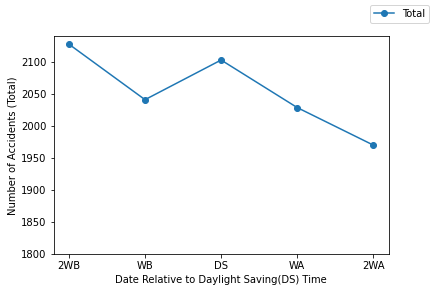

In [137]:
fig,ax=plt.subplots()
line=ax.plot(ma.columns,ma.loc['Total'],label='Total',marker='o')
ax.set_xlabel('Date Relative to Daylight Saving(DS) Time')
ax.set_ylabel('Number of Accidents (Total)')
ax.figure.legend()
plt.ylim(1800,2140)
plt.show()

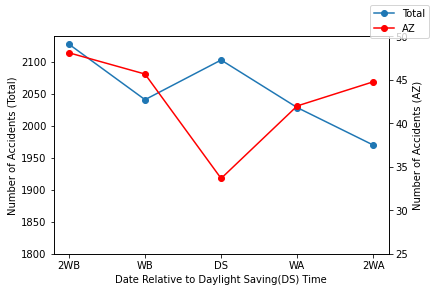

In [138]:
fig,ax=plt.subplots()
line=ax.plot(ma.columns,ma.loc['Total'],label='Total',marker='o')
ax.set_xlabel('Date Relative to Daylight Saving(DS) Time')
ax.set_ylabel('Number of Accidents (Total)')
plt.ylim(1800,2140)
ax2=ax.twinx()
ax2.plot(ma.columns,ma.loc['AZ'], color='r',label='AZ',marker='o')
ax2.set_ylabel('Number of Accidents (AZ)')
ax2.set_ylim(25,50)
ax.figure.legend()
plt.show()

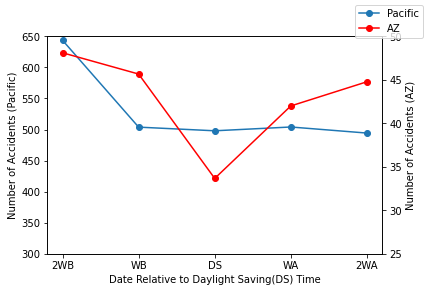

In [139]:
fig,ax=plt.subplots()
line=ax.plot(ma.columns,ma.loc['Pacific'],label='Pacific',marker='o')
ax.set_xlabel('Date Relative to Daylight Saving(DS) Time')
ax.set_ylabel('Number of Accidents (Pacific)')
plt.ylim(300,650)
ax2=ax.twinx()
ax2.plot(ma.columns,ma.loc['AZ'], color='r',label='AZ',marker='o')
ax2.set_ylabel('Number of Accidents (AZ)')
ax2.set_ylim(25,50)
ax.figure.legend()
plt.show()

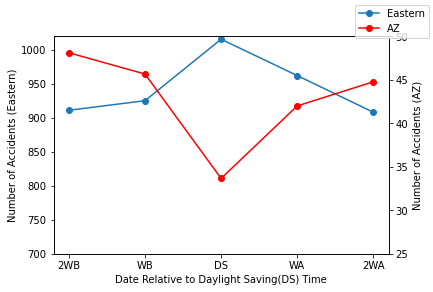

In [140]:
fig,ax=plt.subplots()
line=ax.plot(ma.columns,ma.loc['Eastern'],label='Eastern',marker='o')
ax.set_xlabel('Date Relative to Daylight Saving(DS) Time')
ax.set_ylabel('Number of Accidents (Eastern)')
plt.ylim(700,1020)
ax2=ax.twinx()
ax2.plot(ma.columns,ma.loc['AZ'], color='r',label='AZ',marker='o')
ax2.set_ylabel('Number of Accidents (AZ)')
ax2.set_ylim(25,50)
ax.figure.legend()
plt.show()

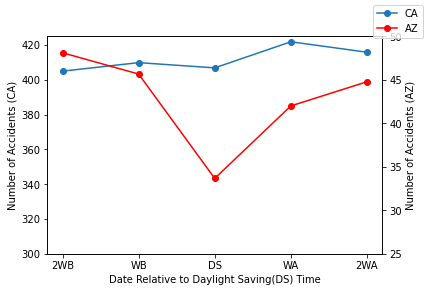

In [141]:
fig,ax=plt.subplots()
ax.plot(ma.columns,ma.loc['CA'],label='CA',marker='o')
ax.set_xlabel('Date Relative to Daylight Saving(DS) Time')
ax.set_ylabel('Number of Accidents (CA)')
plt.ylim(300,425)
ax2=ax.twinx()
line=ax2.plot(ma.columns,ma.loc['AZ'], color='r',label='AZ',marker='o')
ax2.set_ylabel('Number of Accidents (AZ)')
ax2.set_ylim(25,50)
ax.figure.legend()
plt.show()

In [143]:
ma

,2WB,WB,DS,WA,2WA
Total,2127.78,2041,2103,2028.67,1970
AZ,48.1111,45.6667,33.6667,42,44.7778
Pacific,643.667,503.889,498,504.111,494.333
Eastern,911.222,925.333,1015.78,962.333,908.333
CA,405,409.889,406.889,421.889,415.889


In [144]:
#Find the average number of car accidents for all the different states/regions, not including the Daylight Saving entry
avg_total=(ma.loc['Total','2WB']+ma.loc['Total','WB']+ma.loc['Total','WA']+ma.loc['Total','2WA'])/4
avg_az=(ma.loc['AZ','2WB']+ma.loc['AZ','WB']+ma.loc['AZ','WA']+ma.loc['AZ','2WA'])/4
avg_pac=(ma.loc['Pacific','2WB']+ma.loc['Pacific','WB']+ma.loc['Pacific','WA']+ma.loc['Pacific','2WA'])/4
avg_east=(ma.loc['Eastern','2WB']+ma.loc['Eastern','WB']+ma.loc['Eastern','WA']+ma.loc['Eastern','2WA'])/4
avg_ca=(ma.loc['CA','2WB']+ma.loc['CA','WB']+ma.loc['CA','WA']+ma.loc['CA','2WA'])/4

In [145]:
#create a dataframe with all the averages so that we can plot it on the charts to compare the DS entry
averages=pd.DataFrame()
averages['2WB']=""
averages['WB']=""
averages['DS']=""
averages['WA']=""
averages['2WA']=""
averages.loc[0,'2WB']=averages.loc[0,'WB']=averages.loc[0,'DS']=averages.loc[0,'WA']=averages.loc[0,'2WA']=avg_total
averages.loc[1,'2WB']=averages.loc[1,'WB']=averages.loc[1,'DS']=averages.loc[1,'WA']=averages.loc[1,'2WA']=avg_az
averages.loc[2,'2WB']=averages.loc[2,'WB']=averages.loc[2,'DS']=averages.loc[2,'WA']=averages.loc[2,'2WA']=avg_pac
averages.loc[3,'2WB']=averages.loc[3,'WB']=averages.loc[3,'DS']=averages.loc[3,'WA']=averages.loc[3,'2WA']=avg_east
averages.loc[4,'2WB']=averages.loc[4,'WB']=averages.loc[4,'DS']=averages.loc[4,'WA']=averages.loc[4,'2WA']=avg_ca
averages.rename(index={0: "Total",1:"AZ",2:"Pacific",3:"Eastern",4:"CA"},inplace=True)

In [146]:
averages

,2WB,WB,DS,WA,2WA
Total,2041.86,2041.86,2041.86,2041.86,2041.86
AZ,45.1389,45.1389,45.1389,45.1389,45.1389
Pacific,536.5,536.5,536.5,536.5,536.5
Eastern,926.806,926.806,926.806,926.806,926.806
CA,413.167,413.167,413.167,413.167,413.167


In [147]:
#create a function that finds the offset between the 2 numbers and returns as a decimal point and as a string in percentage format
def offset(x, y):
    z=(y-x)/x
    p=round(z*100,1)
    return p, str(p)+'%'

In [148]:
total_number,total_string=offset(averages.loc['Total','DS'],ma.loc['Total','DS'])
az_number,az_string=offset(averages.loc['AZ','DS'],ma.loc['AZ','DS'])
pac_number,pac_string=offset(averages.loc['Pacific','DS'],ma.loc['Pacific','DS'])
east_number,east_string=offset(averages.loc['Eastern','DS'],ma.loc['Eastern','DS'])
ca_number,ca_string=offset(averages.loc['CA','DS'],ma.loc['CA','DS'])

In [149]:
total_number

3.0

In [150]:
ma

,2WB,WB,DS,WA,2WA
Total,2127.78,2041,2103,2028.67,1970
AZ,48.1111,45.6667,33.6667,42,44.7778
Pacific,643.667,503.889,498,504.111,494.333
Eastern,911.222,925.333,1015.78,962.333,908.333
CA,405,409.889,406.889,421.889,415.889


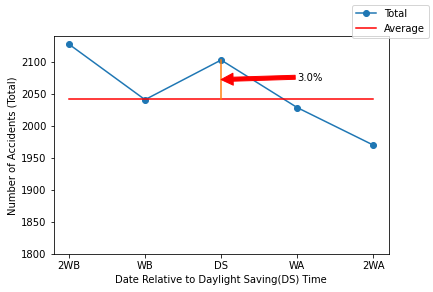

In [151]:
fig,ax=plt.subplots()
line=ax.plot(ma.columns,ma.loc['Total'],label='Total',marker='o')
ax.set_xlabel('Date Relative to Daylight Saving(DS) Time')
ax.set_ylabel('Number of Accidents (Total)')
ax.plot(averages.columns,averages.loc['Total'],label='Average',color='r')
ax.figure.legend()
plt.ylim(1800,2140)
plt.plot(['DS','DS'],[averages.loc['Total','DS'],ma.loc['Total','DS']])
plt.annotate(total_string,xy=('DS',(averages.loc['Total','DS']+ma.loc['Total','DS'])/2),xytext=('WA',(averages.loc['Total','DS']+ma.loc['Total','DS'])/2-1),arrowprops={'color':'red'})
plt.show()

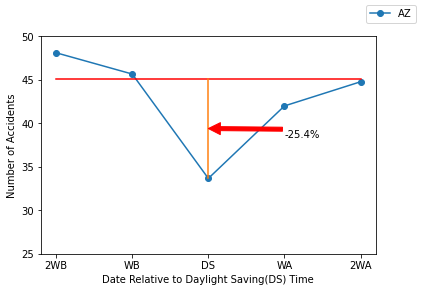

In [152]:
fig,ax=plt.subplots()
line=ax.plot(ma.columns,ma.loc['AZ'],label='AZ',marker='o')
ax.set_xlabel('Date Relative to Daylight Saving(DS) Time')
ax.set_ylabel('Number of Accidents')
ax.figure.legend()
ax.plot(averages.columns,averages.loc['AZ'],label='Average',color='r')
plt.ylim(25,50)
plt.plot(['DS','DS'],[averages.loc['AZ','DS'],ma.loc['AZ','DS']])
plt.annotate(az_string,xy=('DS',(averages.loc['AZ','DS']+ma.loc['AZ','DS'])/2),xytext=('WA',(averages.loc['AZ','DS']+ma.loc['AZ','DS'])/2-1),arrowprops={'color':'red'})
plt.show()

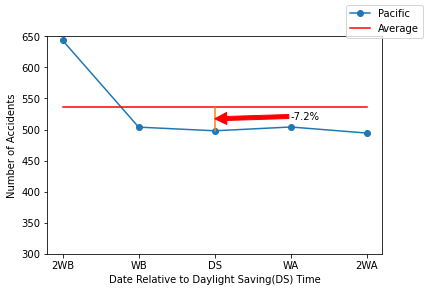

In [153]:
fig,ax=plt.subplots()
line=ax.plot(ma.columns,ma.loc['Pacific'],label='Pacific',marker='o')
ax.set_xlabel('Date Relative to Daylight Saving(DS) Time')
ax.set_ylabel('Number of Accidents')
ax.plot(averages.columns,averages.loc['Pacific'],label='Average',color='r')
ax.figure.legend()
plt.ylim(300,650)
plt.plot(['DS','DS'],[averages.loc['Pacific','DS'],ma.loc['Pacific','DS']])
plt.annotate(pac_string,xy=('DS',(averages.loc['Pacific','DS']+ma.loc['Pacific','DS'])/2),xytext=('WA',(averages.loc['Pacific','DS']+ma.loc['Pacific','DS'])/2-1),arrowprops={'color':'red'})
plt.show()
plt.show()

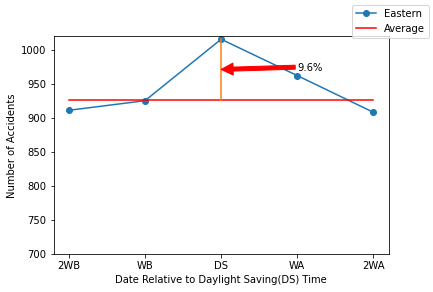

In [154]:
fig,ax=plt.subplots()
line=ax.plot(ma.columns,ma.loc['Eastern'],label='Eastern',marker='o')
ax.set_xlabel('Date Relative to Daylight Saving(DS) Time')
ax.set_ylabel('Number of Accidents')
ax.plot(averages.columns,averages.loc['Eastern'],label='Average',color='r')
ax.figure.legend()
plt.ylim(700,1020)
plt.plot(['DS','DS'],[averages.loc['Eastern','DS'],ma.loc['Eastern','DS']])
plt.annotate(east_string,xy=('DS',(averages.loc['Eastern','DS']+ma.loc['Eastern','DS'])/2),xytext=('WA',(averages.loc['Eastern','DS']+ma.loc['Eastern','DS'])/2-1),arrowprops={'color':'red'})
plt.show()

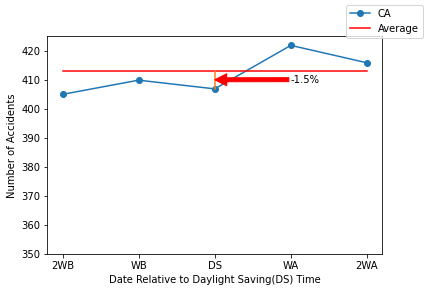

In [155]:
fig,ax=plt.subplots()
line=ax.plot(ma.columns,ma.loc['CA'],label='CA',marker='o')
ax.set_xlabel('Date Relative to Daylight Saving(DS) Time')
ax.set_ylabel('Number of Accidents')
ax.plot(averages.columns,averages.loc['CA'],label='Average',color='r')
ax.figure.legend()
plt.ylim(350,425)
plt.plot(['DS','DS'],[averages.loc['CA','DS'],ma.loc['CA','DS']])
plt.annotate(ca_string,xy=('DS',(averages.loc['CA','DS']+ma.loc['CA','DS'])/2),xytext=('WA',(averages.loc['CA','DS']+ma.loc['CA','DS'])/2-1),arrowprops={'color':'red'})
plt.show()

In [156]:
ma

,2WB,WB,DS,WA,2WA
Total,2127.78,2041,2103,2028.67,1970
AZ,48.1111,45.6667,33.6667,42,44.7778
Pacific,643.667,503.889,498,504.111,494.333
Eastern,911.222,925.333,1015.78,962.333,908.333
CA,405,409.889,406.889,421.889,415.889


In [157]:
#Create a datframe for the percentages to plot bar chart comparisons
percentages=pd.DataFrame({'AZ':[az_number,az_number,az_number,az_number],'Region':[total_number,pac_number,east_number,ca_number]},index=['Total','Pacific','Eastern','CA'])


In [158]:
percentages

,AZ,Region
Total,-25.4,3.0
Pacific,-25.4,-7.2
Eastern,-25.4,9.6
CA,-25.4,-1.5


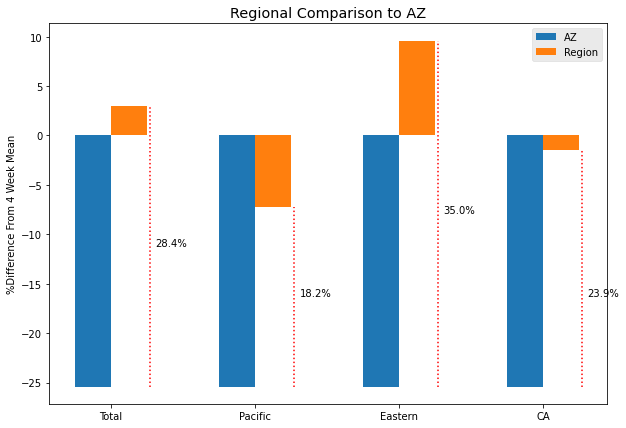

In [159]:
from matplotlib.pyplot import figure
labels=list(percentages.index)
x=np.arange(len(labels))
width=0.25
fig, ax = plt.subplots()
plot1=ax.bar(x-width/2,percentages['AZ'],width,label='AZ')
plot2=ax.bar(x+width/2,percentages['Region'],width,label='Region')
plt.style.use('ggplot')
ax.set_ylabel('%Difference From 4 Week Mean')
ax.set_title('Regional Comparison to AZ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.plot([width+0.02,width+0.02],[az_number,total_number],'r:')
plt.annotate(str(total_number-az_number)+'%',xy=(width+0.06,(az_number+total_number)/2))

plt.plot([width+1.02,width+1.02],[az_number,pac_number],'r:')
plt.annotate(str(pac_number-az_number)+'%',xy=(width+1.06,(pac_number+az_number)/2))

plt.plot([width+2.02,width+2.02],[az_number,east_number],'r:')
plt.annotate(str(east_number-az_number)+'%',xy=(width+2.06,(east_number+az_number)/2))

plt.plot([width+3.02,width+3.02],[az_number,ca_number],'r:')
plt.annotate(str(ca_number-az_number)+'%',xy=(width+3.06,(pac_number+az_number)/2))
plt.style.use('ggplot')
fig.set_size_inches(10, 7)
plt.show()

In [160]:
#find the difference between each region and arizona 
total_diff=total_number-az_number
pac_diff=pac_number-az_number
east_diff=east_number-az_number
ca_diff=ca_number-az_number

Assuming the 2019 accident number is a fair projection of future accidents, we can calculate the number of annual avoidable accidents assuming that if states no longer have daylight saving then their % difference from the 4 week mean would be similar to Arizona

In [161]:
total_avoidable=round(total_diff*ma.loc['Total','DS'],0)
pac_avoidable=round(pac_diff*ma.loc['Pacific','DS'],0)
east_avoidable=round(east_diff*ma.loc['Eastern','DS'],0)
ca_avoidable=round(ca_diff*ma.loc['CA','DS'],0)
print('The potentail avoidable accidents for the entire US is '+str(total_avoidable)+' accidents')
print('The potentail avoidable accidents for the Pacific region is '+str(pac_avoidable)+' accidents')
print('The potentail avoidable accidents for the Eastern region is '+str(east_avoidable)+' accidents')
print('The potentail avoidable accidents for the State of California is '+str(ca_avoidable)+' accidents')

The potentail avoidable accidents for the entire US is 59725.0 accidents
The potentail avoidable accidents for the Pacific region is 9064.0 accidents
The potentail avoidable accidents for the Eastern region is 35552.0 accidents
The potentail avoidable accidents for the State of California is 9725.0 accidents


In [162]:
total_avoidable

59725.0

<h1>The fall time change</h1>

In [163]:
l=[datetime.datetime(2017, 11, 5),datetime.datetime(2018, 11, 4),datetime.datetime(2019, 11, 3)]
ft=pd.DataFrame(l,columns=['FT'])

In [164]:
ft['FT1']=""
ft['FT2']=""

In [165]:
#fill the dataframe with the 2 subsequent days 
for i in range(3):
    for j in range (1,3):
        ft.loc[i,'FT'+str(j)]=ft.loc[i,'FT']+timedelta(days=j)

In [166]:
ft

,FT,FT1,FT2
0,2017-11-05,2017-11-06 00:00:00,2017-11-07 00:00:00
1,2018-11-04,2018-11-05 00:00:00,2018-11-06 00:00:00
2,2019-11-03,2019-11-04 00:00:00,2019-11-05 00:00:00


In [167]:
#create the Datframe of the entries for the week before Fall Time
fwb=ft.copy(deep=True)
fwb=ft+timedelta(days=-7)

#create the Dataframe of the entreies for the week after Fall Time
fwa=ft.copy(deep=True)
fwa=ft+timedelta(days=7)

#create the Datframe of the entries for two weeks before Fall Time
two_fwb=ft.copy(deep=True)
two_fwb=ft+timedelta(days=-14)

#create the Datframe of the entries for two weeks after Fall Time
two_fwa=ft.copy(deep=True)
two_fwa=ft+timedelta(days=14)


In [168]:
fwa['FT']

0   2017-11-12
1   2018-11-11
2   2019-11-10
Name: FT, dtype: datetime64[ns]

In [169]:
fall=d[((d['Date']>=two_fwb['FT'][0])&(d['Date']<=two_fwa['FT2'][0]))|((d['Date']>=two_fwb['FT'][1])&(d['Date']<=two_fwa['FT2'][1]))|((d['Date']>=two_fwb['FT'][2])&(d['Date']<=two_fwa['FT2'][2]))]

In [170]:
#Exclude entries from the State of Arizona since Arizona does not use daylight saving time
#create a seperate dataframe for the entries from Arizona for reference
faz=fall[fall['State']=='AZ'].copy(deep=True)
fall=fall[fall['State']!='AZ'].copy(deep=True)

In [171]:
faz_count_ft=ft.copy(deep=True)
faz_count_wa=fwa.copy(deep=True)
faz_count_wb=fwb.copy(deep=True)
faz_count_2wa=two_fwa.copy(deep=True)
faz_count_2wb=two_fwb.copy(deep=True)


In [172]:
#count the number of accidents for the Week Before Fall Time
for i in range(3):
    for j in fwb.columns:
        faz_count_wb.loc[i,j]=len(faz[faz['Date']==fwb.loc[i,j]])
#count the number of accidents for the Fall Time 
for i in range(3):
    for j in ft.columns:
        faz_count_ft.loc[i,j]=len(faz[faz['Date']==ft.loc[i,j]])
#count the number of accidents for the Week After Fall Time week 
for i in range(3):
    for j in fwa.columns:
        faz_count_wa.loc[i,(j)]=len(faz[faz['Date']==fwa.loc[i,j]])
#count the number of accidents for the Week 2 weeks Before Fall Time 
for i in range(3):
    for j in two_fwb.columns:
        faz_count_2wb.loc[i,j]=len(faz[faz['Date']==two_fwb.loc[i,j]])
#count the number of accidents for the Week 2 weeks After Fall Time 
for i in range(3):
    for j in two_fwa.columns:
        faz_count_2wa.loc[i,j]=len(faz[faz['Date']==two_fwa.loc[i,j]])


In [173]:
#Convert the entries to integers so that we can perform calculations on the dataframe
faz_count_wb=faz_count_wb.apply(pd.to_numeric)
faz_count_ft=faz_count_ft.apply(pd.to_numeric)
faz_count_wa=faz_count_wa.apply(pd.to_numeric)
faz_count_2wa=faz_count_2wa.apply(pd.to_numeric)
faz_count_2wb=faz_count_2wb.apply(pd.to_numeric)
#Create a total column to find the sum of all accidents for a given week
faz_count_wb['Total']=faz_count_wb.sum(axis=1)
faz_count_ft['Total']=faz_count_ft.sum(axis=1)
faz_count_wa['Total']=faz_count_wa.sum(axis=1)
faz_count_2wb['Total']=faz_count_2wb.sum(axis=1)
faz_count_2wa['Total']=faz_count_2wa.sum(axis=1)


In [174]:
faz_count_wb.loc['mean'] = faz_count_wb.mean()
faz_count_ft.loc['mean'] = faz_count_ft.mean()
faz_count_wa.loc['mean'] = faz_count_wa.mean()
faz_count_2wb.loc['mean'] = faz_count_2wb.mean()
faz_count_2wa.loc['mean'] = faz_count_2wa.mean()


In [175]:
#create the moving average table for 3 days (Sunday-Tuesday) for the weeks of interest for the Arizona Data
faz_ma=pd.DataFrame()
faz_ma['2WB']=""
faz_ma['WB']=""
faz_ma['FT']=""
faz_ma['WA']=""
faz_ma['2WA']=""

faz_ma.loc[0,'2WB']=(faz_count_2wb.loc['mean','FT']+faz_count_2wb.loc['mean','FT1']+faz_count_2wb.loc['mean','FT2'])/3
faz_ma.loc[0,'WB']=(faz_count_wb.loc['mean','FT']+faz_count_wb.loc['mean','FT1']+faz_count_wb.loc['mean','FT2'])/3
faz_ma.loc[0,'FT']=(faz_count_ft.loc['mean','FT']+faz_count_ft.loc['mean','FT1']+faz_count_ft.loc['mean','FT2'])/3
faz_ma.loc[0,'WA']=(faz_count_wa.loc['mean','FT']+faz_count_wa.loc['mean','FT1']+faz_count_wa.loc['mean','FT2'])/3
faz_ma.loc[0,'2WA']=(faz_count_2wa.loc['mean','FT']+faz_count_2wa.loc['mean','FT1']+faz_count_2wa.loc['mean','FT2'])/3


In [176]:
faz_count_ft=ft.copy(deep=True)
faz_count_wa=fwa.copy(deep=True)
faz_count_wb=fwb.copy(deep=True)
faz_count_2wa=two_fwa.copy(deep=True)
faz_count_2wb=two_fwb.copy(deep=True)


In [177]:
fall[(fall['Timezone']!='US/Eastern')&(fall['Timezone']!='US/Pacific')&(fall['Timezone']!='US/Central')&(fall['Timezone']!='US/Mountain')].State.unique()

array(['CA', 'SC', 'UT', 'FL', 'OR', 'LA', 'WA', 'MD', 'ME'], dtype=object)

In [178]:
fpacific=fall[(fall['Timezone']=='US/Pacific')&(fall['State']!='LA')|(fall['State']=='CA')|(fall['State']=='OR')|(fall['State']=='WA')].copy(deep=True)

In [179]:
feastern=fall[(fall['Timezone']=='US/Eastern')|(fall['State']=='FL')|(fall['State']=='SC')|(fall['State']=='MD')|(fall['State']=='ME')].copy(deep=True)

In [180]:
fca=fall[fall['State']=='CA'].copy(deep=True)

In [181]:
fpac_count_ft=ft.copy(deep=True)
fpac_count_wa=fwa.copy(deep=True)
fpac_count_wb=fwb.copy(deep=True)
fpac_count_2wa=two_fwa.copy(deep=True)
fpac_count_2wb=two_fwb.copy(deep=True)


In [182]:
#count the number of accidents for the Week Before Fall Time
for i in range(3):
    for j in fwb.columns:
        fpac_count_wb.loc[i,j]=len(fpacific[fpacific['Date']==fwb.loc[i,j]])
#count the number of accidents for the Fall Time 
for i in range(3):
    for j in ft.columns:
        fpac_count_ft.loc[i,j]=len(fpacific[fpacific['Date']==ft.loc[i,j]])
#count the number of accidents for the Week After Fall Time week 
for i in range(3):
    for j in fwa.columns:
        fpac_count_wa.loc[i,(j)]=len(fpacific[fpacific['Date']==fwa.loc[i,j]])
#count the number of accidents for the Week 2 weeks Before Fall Time 
for i in range(3):
    for j in two_fwb.columns:
        fpac_count_2wb.loc[i,j]=len(fpacific[fpacific['Date']==two_fwb.loc[i,j]])
#count the number of accidents for the Week 2 weeks After Fall Time 
for i in range(3):
    for j in two_fwa.columns:
        fpac_count_2wa.loc[i,j]=len(fpacific[fpacific['Date']==two_fwa.loc[i,j]])


In [183]:
#Convert the entries to integers so that we can perform calculations on the dataframe
fpac_count_wb=fpac_count_wb.apply(pd.to_numeric)
fpac_count_ft=fpac_count_ft.apply(pd.to_numeric)
fpac_count_wa=fpac_count_wa.apply(pd.to_numeric)
fpac_count_2wa=fpac_count_2wa.apply(pd.to_numeric)
fpac_count_2wb=fpac_count_2wb.apply(pd.to_numeric)
#Create a total column to find the sum of all accidents for a given week
fpac_count_wb['Total']=fpac_count_wb.sum(axis=1)
fpac_count_ft['Total']=fpac_count_ft.sum(axis=1)
fpac_count_wa['Total']=fpac_count_wa.sum(axis=1)
fpac_count_2wb['Total']=fpac_count_2wb.sum(axis=1)
fpac_count_2wa['Total']=fpac_count_2wa.sum(axis=1)


In [184]:
fpac_count_wb.loc['mean'] = fpac_count_wb.mean()
fpac_count_ft.loc['mean'] = fpac_count_ft.mean()
fpac_count_wa.loc['mean'] = fpac_count_wa.mean()
fpac_count_2wb.loc['mean'] = fpac_count_2wb.mean()
fpac_count_2wa.loc['mean'] = fpac_count_2wa.mean()


In [185]:
#create the moving average table for 3 days (Sunday-Tuesday) for the weeks of interest for the  Data
fpac_ma=pd.DataFrame()
fpac_ma['2WB']=""
fpac_ma['WB']=""
fpac_ma['FT']=""
fpac_ma['WA']=""
fpac_ma['2WA']=""

fpac_ma.loc[0,'2WB']=(fpac_count_2wb.loc['mean','FT']+fpac_count_2wb.loc['mean','FT1']+fpac_count_2wb.loc['mean','FT2'])/3
fpac_ma.loc[0,'WB']=(fpac_count_wb.loc['mean','FT']+fpac_count_wb.loc['mean','FT1']+fpac_count_wb.loc['mean','FT2'])/3
fpac_ma.loc[0,'FT']=(fpac_count_ft.loc['mean','FT']+fpac_count_ft.loc['mean','FT1']+fpac_count_ft.loc['mean','FT2'])/3
fpac_ma.loc[0,'WA']=(fpac_count_wa.loc['mean','FT']+fpac_count_wa.loc['mean','FT1']+fpac_count_wa.loc['mean','FT2'])/3
fpac_ma.loc[0,'2WA']=(fpac_count_2wa.loc['mean','FT']+fpac_count_2wa.loc['mean','FT1']+fpac_count_2wa.loc['mean','FT2'])/3


In [186]:
faz_ma

,2WB,WB,FT,WA,2WA
0,61.3333,57.5556,67.3333,70.6667,70.8889


In [187]:
feast_count_ft=ft.copy(deep=True)
feast_count_wa=fwa.copy(deep=True)
feast_count_wb=fwb.copy(deep=True)
feast_count_2wa=two_fwa.copy(deep=True)
feast_count_2wb=two_fwb.copy(deep=True)


In [188]:
#count the number of accidents for the Week Before Fall Time
for i in range(3):
    for j in fwb.columns:
        feast_count_wb.loc[i,j]=len(feastern[feastern['Date']==fwb.loc[i,j]])
#count the number of accidents for the Fall Time 
for i in range(3):
    for j in ft.columns:
        feast_count_ft.loc[i,j]=len(feastern[feastern['Date']==ft.loc[i,j]])
#count the number of accidents for the Week After Fall Time week 
for i in range(3):
    for j in fwa.columns:
        feast_count_wa.loc[i,(j)]=len(feastern[feastern['Date']==fwa.loc[i,j]])
#count the number of accidents for the Week 2 weeks Before Fall Time 
for i in range(3):
    for j in two_fwb.columns:
        feast_count_2wb.loc[i,j]=len(feastern[feastern['Date']==two_fwb.loc[i,j]])
#count the number of accidents for the Week 2 weeks After Fall Time 
for i in range(3):
    for j in two_fwa.columns:
        feast_count_2wa.loc[i,j]=len(feastern[feastern['Date']==two_fwa.loc[i,j]])


In [189]:
#Convert the entries to integers so that we can perform calculations on the dataframe
feast_count_wb=feast_count_wb.apply(pd.to_numeric)
feast_count_ft=feast_count_ft.apply(pd.to_numeric)
feast_count_wa=feast_count_wa.apply(pd.to_numeric)
feast_count_2wa=feast_count_2wa.apply(pd.to_numeric)
feast_count_2wb=feast_count_2wb.apply(pd.to_numeric)
#Create a total column to find the sum of all accidents for a given week
feast_count_wb['Total']=feast_count_wb.sum(axis=1)
feast_count_ft['Total']=feast_count_ft.sum(axis=1)
feast_count_wa['Total']=feast_count_wa.sum(axis=1)
feast_count_2wb['Total']=feast_count_2wb.sum(axis=1)
feast_count_2wa['Total']=feast_count_2wa.sum(axis=1)


In [190]:
feast_count_wb.loc['mean'] = feast_count_wb.mean()
feast_count_ft.loc['mean'] = feast_count_ft.mean()
feast_count_wa.loc['mean'] = feast_count_wa.mean()
feast_count_2wb.loc['mean'] = feast_count_2wb.mean()
feast_count_2wa.loc['mean'] = feast_count_2wa.mean()


In [191]:
#create the moving average table for 3 days (Sunday-Tuesday) for the weeks of interest for the Data
feast_ma=pd.DataFrame()
feast_ma['2WB']=""
feast_ma['WB']=""
feast_ma['FT']=""
feast_ma['WA']=""
feast_ma['2WA']=""

feast_ma.loc[0,'2WB']=(feast_count_2wb.loc['mean','FT']+feast_count_2wb.loc['mean','FT1']+feast_count_2wb.loc['mean','FT2'])/3
feast_ma.loc[0,'WB']=(feast_count_wb.loc['mean','FT']+feast_count_wb.loc['mean','FT1']+feast_count_wb.loc['mean','FT2'])/3
feast_ma.loc[0,'FT']=(feast_count_ft.loc['mean','FT']+feast_count_ft.loc['mean','FT1']+feast_count_ft.loc['mean','FT2'])/3
feast_ma.loc[0,'WA']=(feast_count_wa.loc['mean','FT']+feast_count_wa.loc['mean','FT1']+feast_count_wa.loc['mean','FT2'])/3
feast_ma.loc[0,'2WA']=(feast_count_2wa.loc['mean','FT']+feast_count_2wa.loc['mean','FT1']+feast_count_2wa.loc['mean','FT2'])/3



In [192]:
fca_count_ft=ft.copy(deep=True)
fca_count_wa=fwa.copy(deep=True)
fca_count_wb=fwb.copy(deep=True)
fca_count_2wa=two_fwa.copy(deep=True)
fca_count_2wb=two_fwb.copy(deep=True)


In [193]:
#count the number of accidents for the Week Before Fall Time
for i in range(3):
    for j in fwb.columns:
        fca_count_wb.loc[i,j]=len(fca[fca['Date']==fwb.loc[i,j]])
#count the number of accidents for the Fall Time 
for i in range(3):
    for j in ft.columns:
        fca_count_ft.loc[i,j]=len(fca[fca['Date']==ft.loc[i,j]])
#count the number of accidents for the Week After Fall Time week 
for i in range(3):
    for j in fwa.columns:
        fca_count_wa.loc[i,(j)]=len(fca[fca['Date']==fwa.loc[i,j]])
#count the number of accidents for the Week 2 weeks Before Fall Time 
for i in range(3):
    for j in two_fwb.columns:
        fca_count_2wb.loc[i,j]=len(fca[fca['Date']==two_fwb.loc[i,j]])
#count the number of accidents for the Week 2 weeks After Fall Time 
for i in range(3):
    for j in two_fwa.columns:
        fca_count_2wa.loc[i,j]=len(fca[fca['Date']==two_fwa.loc[i,j]])


In [194]:
#Convert the entries to integers so that we can perform calculations on the dataframe
fca_count_wb=fca_count_wb.apply(pd.to_numeric)
fca_count_ft=fca_count_ft.apply(pd.to_numeric)
fca_count_wa=fca_count_wa.apply(pd.to_numeric)
fca_count_2wa=fca_count_2wa.apply(pd.to_numeric)
fca_count_2wb=fca_count_2wb.apply(pd.to_numeric)
#Create a total column to find the sum of all accidents for a given week
fca_count_wb['Total']=fca_count_wb.sum(axis=1)
fca_count_ft['Total']=fca_count_ft.sum(axis=1)
fca_count_wa['Total']=fca_count_wa.sum(axis=1)
fca_count_2wb['Total']=fca_count_2wb.sum(axis=1)
fca_count_2wa['Total']=fca_count_2wa.sum(axis=1)


In [195]:
fca_count_wb.loc['mean'] = fca_count_wb.mean()
fca_count_ft.loc['mean'] = fca_count_ft.mean()
fca_count_wa.loc['mean'] = fca_count_wa.mean()
fca_count_2wb.loc['mean'] = fca_count_2wb.mean()
fca_count_2wa.loc['mean'] = fca_count_2wa.mean()


In [196]:
#create the moving average table for 3 days (Sunday-Tuesday) for the weeks of interest for the Data
fca_ma=pd.DataFrame()
fca_ma['2WB']=""
fca_ma['WB']=""
fca_ma['FT']=""
fca_ma['WA']=""
fca_ma['2WA']=""

fca_ma.loc[0,'2WB']=(fca_count_2wb.loc['mean','FT']+fca_count_2wb.loc['mean','FT1']+fca_count_2wb.loc['mean','FT2'])/3
fca_ma.loc[0,'WB']=(fca_count_wb.loc['mean','FT']+fca_count_wb.loc['mean','FT1']+fca_count_wb.loc['mean','FT2'])/3
fca_ma.loc[0,'FT']=(fca_count_ft.loc['mean','FT']+fca_count_ft.loc['mean','FT1']+fca_count_ft.loc['mean','FT2'])/3
fca_ma.loc[0,'WA']=(fca_count_wa.loc['mean','FT']+fca_count_wa.loc['mean','FT1']+fca_count_wa.loc['mean','FT2'])/3
fca_ma.loc[0,'2WA']=(fca_count_2wa.loc['mean','FT']+fca_count_2wa.loc['mean','FT1']+fca_count_2wa.loc['mean','FT2'])/3


In [197]:
ftotal_count_ft=ft.copy(deep=True)
ftotal_count_wa=fwa.copy(deep=True)
ftotal_count_wb=fwb.copy(deep=True)
ftotal_count_2wa=two_fwa.copy(deep=True)
ftotal_count_2wb=two_fwb.copy(deep=True)


In [198]:
#count the number of accidents for the Week Before Fall Time
for i in range(3):
    for j in fwb.columns:
        ftotal_count_wb.loc[i,j]=len(fall[fall['Date']==fwb.loc[i,j]])
#count the number of accidents for the Fall Time data frame
for i in range(3):
    for j in ft.columns:
        ftotal_count_ft.loc[i,j]=len(fall[fall['Date']==ft.loc[i,j]])
#count the number of accidents for the Week After Fall Time week 
for i in range(3):
    for j in fwa.columns:
        ftotal_count_wa.loc[i,(j)]=len(fall[fall['Date']==fwa.loc[i,j]])
#count the number of accidents for the Week 2 weeks Before Fall Time 
for i in range(3):
    for j in two_fwb.columns:
        ftotal_count_2wb.loc[i,j]=len(fall[fall['Date']==two_fwb.loc[i,j]])
#count the number of accidents for the Week 2 weeks After Fall Time 
for i in range(3):
    for j in two_fwa.columns:
        ftotal_count_2wa.loc[i,j]=len(fall[fall['Date']==two_fwa.loc[i,j]])


In [199]:
#Convert the entries to integers so that we can perform calculations on the dataframe
ftotal_count_wb=ftotal_count_wb.apply(pd.to_numeric)
ftotal_count_ft=ftotal_count_ft.apply(pd.to_numeric)
ftotal_count_wa=ftotal_count_wa.apply(pd.to_numeric)
ftotal_count_2wa=ftotal_count_2wa.apply(pd.to_numeric)
ftotal_count_2wb=ftotal_count_2wb.apply(pd.to_numeric)
#Create a total column to find the sum of all accidents for a given week
ftotal_count_wb['Total']=ftotal_count_wb.sum(axis=1)
ftotal_count_ft['Total']=ftotal_count_ft.sum(axis=1)
ftotal_count_wa['Total']=ftotal_count_wa.sum(axis=1)
ftotal_count_2wb['Total']=ftotal_count_2wb.sum(axis=1)
ftotal_count_2wa['Total']=ftotal_count_2wa.sum(axis=1)


In [200]:
ftotal_count_wb.loc['mean'] = ftotal_count_wb.mean()
ftotal_count_ft.loc['mean'] = ftotal_count_ft.mean()
ftotal_count_wa.loc['mean'] = ftotal_count_wa.mean()
ftotal_count_2wb.loc['mean'] = ftotal_count_2wb.mean()
ftotal_count_2wa.loc['mean'] = ftotal_count_2wa.mean()


In [201]:
#create the moving average table for 3 days (Sunday-Tuesday) for the weeks of interest for the Data
fma=pd.DataFrame()
fma['2WB']=""
fma['WB']=""
fma['FT']=""
fma['WA']=""
fma['2WA']=""

fma.loc[0,'2WB']=(ftotal_count_2wb.loc['mean','FT']+ftotal_count_2wb.loc['mean','FT1']+ftotal_count_2wb.loc['mean','FT2'])/3
fma.loc[0,'WB']=(ftotal_count_wb.loc['mean','FT']+ftotal_count_wb.loc['mean','FT1']+ftotal_count_wb.loc['mean','FT2'])/3
fma.loc[0,'FT']=(ftotal_count_ft.loc['mean','FT']+ftotal_count_ft.loc['mean','FT1']+ftotal_count_ft.loc['mean','FT2'])/3
fma.loc[0,'WA']=(ftotal_count_wa.loc['mean','FT']+ftotal_count_wa.loc['mean','FT1']+ftotal_count_wa.loc['mean','FT2'])/3
fma.loc[0,'2WA']=(ftotal_count_2wa.loc['mean','FT']+ftotal_count_2wa.loc['mean','FT1']+ftotal_count_2wa.loc['mean','FT2'])/3


In [202]:
#create a dataframe for the moving average for the regions and states of interest
fma=fma.append(faz_ma).append(fpac_ma).append(feast_ma).append(fca_ma)
fma.reset_index(inplace=True)
fma.drop(columns=['index'],inplace=True)
fma.rename(index={0: "Total",1:"AZ",2:"Pacific",3:"Eastern",4:"CA"},inplace=True)

In [203]:
fma

,2WB,WB,FT,WA,2WA
Total,2679.67,2623.22,2697.67,2591,2390.44
AZ,61.3333,57.5556,67.3333,70.6667,70.8889
Pacific,737.778,767.222,826.889,708.889,519.556
Eastern,1204.67,1134,1124.22,1101.56,1195.44
CA,625,614.111,677.556,571.444,367.444


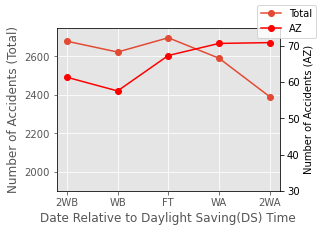

In [204]:
fig,ax=plt.subplots()
plt.style.use('default')
ax.plot(fma.columns,fma.loc['Total'],label='Total',marker='o')
ax.set_xlabel('Date Relative to Daylight Saving(DS) Time')
ax.set_ylabel('Number of Accidents (Total)')
plt.ylim(1900,2750)
ax2=ax.twinx()
ax2.plot(fma.columns,fma.loc['AZ'],color='r',label='AZ',marker='o')
ax2.set_ylabel('Number of Accidents (AZ)')
ax2.set_ylim(30,75)
ax.figure.legend()
fig.set_size_inches(4, 3)

plt.show()

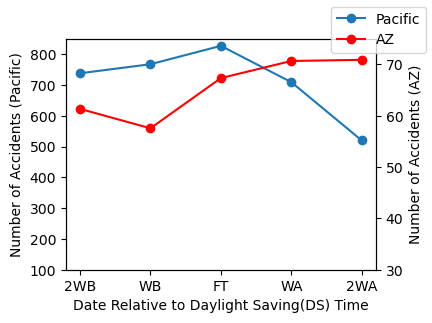

In [205]:
fig,ax=plt.subplots()
plt.style.use('default')
line=ax.plot(fma.columns,fma.loc['Pacific'],label='Pacific',marker='o')
ax.set_xlabel('Date Relative to Daylight Saving(DS) Time')
ax.set_ylabel('Number of Accidents (Pacific)')
plt.ylim(100,850)
ax2=ax.twinx()
ax2.plot(fma.columns,fma.loc['AZ'],color='r',label='AZ',marker='o')
ax2.set_ylabel('Number of Accidents (AZ)')
ax2.set_ylim(30,75)
ax.figure.legend()
fig.set_size_inches(4, 3)

plt.show()


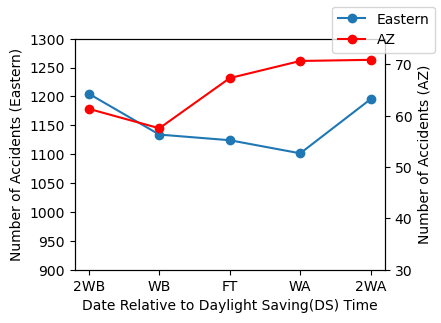

In [206]:
fig,ax=plt.subplots()

line=ax.plot(fma.columns,fma.loc['Eastern'],label='Eastern',marker='o')
ax.set_xlabel('Date Relative to Daylight Saving(DS) Time')
ax.set_ylabel('Number of Accidents (Eastern)')
plt.ylim(900,1300)
ax2=ax.twinx()
ax2.plot(fma.columns,fma.loc['AZ'],color='r',label='AZ',marker='o')
ax2.set_ylabel('Number of Accidents (AZ)')
ax2.set_ylim(30,75)
ax.figure.legend()
fig.set_size_inches(4, 3)
plt.show()


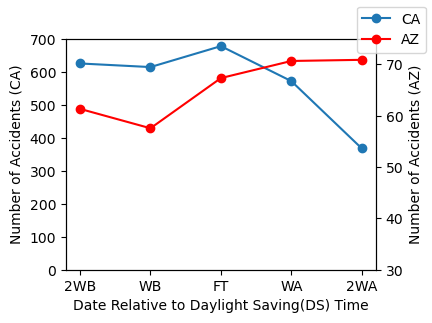

In [207]:
fig,ax=plt.subplots()
ax.plot(fma.columns,fma.loc['CA'],label='CA',marker='o')
ax.set_xlabel('Date Relative to Daylight Saving(DS) Time')
ax.set_ylabel('Number of Accidents (CA)')
plt.ylim(0,700)
ax2=ax.twinx()
line=ax2.plot(fma.columns,fma.loc['AZ'], color='r',label='AZ',marker='o')
ax2.set_ylabel('Number of Accidents (AZ)')
ax2.set_ylim(30,75)
fig.set_size_inches(4, 3)
ax.figure.legend()
plt.show()
